<a href="https://colab.research.google.com/github/otabek7/Gradient_Descent_Kernel_SVM/blob/main/Mavlonov_Spiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 1** :
*   Use the provided notebook file “Spiral.ipynb” to generate a “spiral” dataset.

*   Use the generated spiral dataset to train an RBF-kernel-SVM classifier.

*   Minimize the training error rate by adjusting the regularization parameter λ and the scale parameter σ.

*   Once you finish optimizing the design of the RBF-kernel-SVM classifier, plot the training dataset and the learned decision boundary in the same figure and report the training error rate.

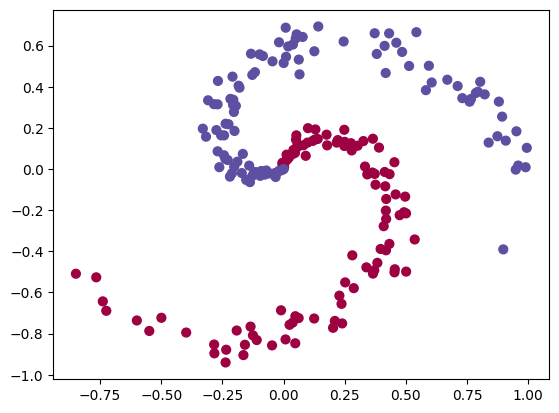

In [329]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

**Training the RBF-kernel-SVM**

In [330]:
from scipy.spatial.distance import cdist

class RBFKernelSVM: # defining the RBF kernel SVM class
    def __init__(self, epochs=100, lr=0.01, lambda_param=0.01, sigma=1.0): # self initializing the initialization params
        self.epochs = epochs
        self.lr = lr
        self.lambda_param = lambda_param
        self.sigma = sigma

    def rbf_kernel(self, X1, X2):
        # computing the RBF kernel
        return np.exp(-cdist(X1, X2, 'sqeuclidean') / (2 * self.sigma**2))

    def fit(self, X, y):
        # converting the labels to {-1, 1} and assigning the alpha
        y = np.where(y == 0, -1, 1)
        N = X.shape[0]
        self.alpha = np.zeros(N)

        # computing the kernel matrix and assigning the K
        K = self.rbf_kernel(X, X)

        # performing gradient descent to optimize alpha value that runs thru number of epochs
        for epoch in range(self.epochs):
            grad = np.dot(K, self.alpha * y) - 1
            self.alpha -= self.lr * grad
            # projection step to maintain 0 <= alpha_i <= 1 / (lambda * N)
            self.alpha = np.clip(self.alpha, 0, 1 / (self.lambda_param * N))

        # calculating the bias
        support_indices = np.where((self.alpha > 1e-5) & (self.alpha < 1 / (self.lambda_param * N)))[0]
        self.b = np.mean([y[i] - np.sum(self.alpha * y * K[:, i]) for i in support_indices])

        # support vectors assignment (SVM)
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # predicting using the trained model and returning the value
        K = self.rbf_kernel(X, self.X_train)
        decision = np.dot(K, self.alpha * self.y_train) + self.b
        return np.sign(decision)


**Testing and Plotting Decision Boundary**

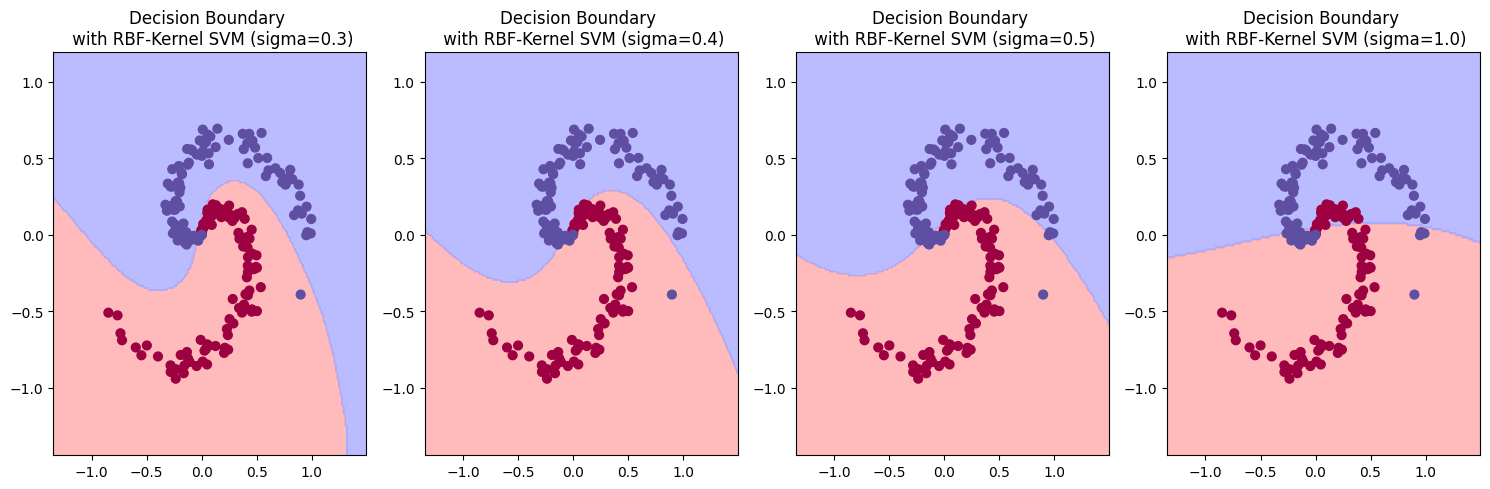

Training Error Rate for sigma=0.3: 3.50%
Training Error Rate for sigma=0.4: 6.50%
Training Error Rate for sigma=0.5: 11.00%
Training Error Rate for sigma=1.0: 28.50%


In [331]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(ax, X, y, model, sigma): # defining a plot_decision_boundary function with 5 params for the chart grid, model and dynamic sigma value
    # creating a grid to evaluate the model
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    #assigning z to the output of the predict function
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plotting the decision boundary with specific colors
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    ax.set_title(f"Decision Boundary \n with RBF-Kernel SVM (sigma={sigma})")

# training the model with 4 sigma values
sigma_values = [0.3, 0.4, 0.5, 1.0]
models = []

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# training and plotting for each sigma value
for i, sigma in enumerate(sigma_values):
    model = RBFKernelSVM(epochs=1000, lr=0.01, lambda_param=0.1, sigma=sigma)
    model.fit(X, y)
    models.append(model)
    plot_decision_boundary(axes[i], X, y, model, sigma)

# showing the plots
plt.tight_layout()
plt.show()

# calculating the training errors and printing them out
for i, model in enumerate(models):
    y_pred = model.predict(X)
    training_error = np.mean(y_pred != np.where(y == 0, -1, 1))
    print(f"Training Error Rate for sigma={sigma_values[i]}: {training_error * 100:.2f}%")


# **Exercise 2:**

*   Use the provided notebook file “Spiral.ipynb” to generate a second “spiral” dataset.

*   Use the generated spiral dataset as a test dataset to test the performance of the learned RBF-kernel-SVM classifier.

*   Is the performance on the test dataset consistent with that on the training dataset? If yes, plot the test dataset and the decision boundary on the same plot and report the test error rate. If not, go back to Exercise 1 and re-adjust the design of the RBF-kernel-SVM classifier so that its performance on the training dataset actually generalizes to the test dataset.

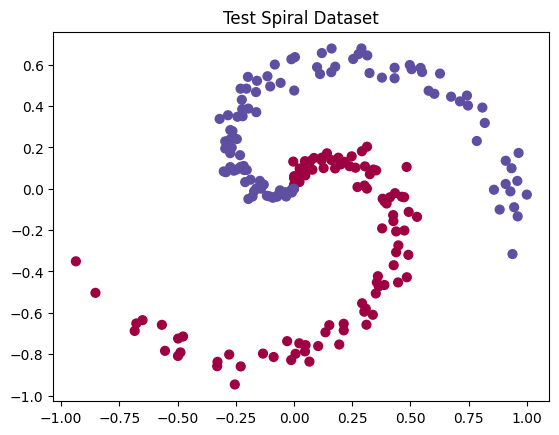

In [332]:
# Generate a second spiral dataset
N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X_test = np.zeros((N * K, D)) # Test data matrix (each row = single example)
y_test = np.zeros(N * K, dtype='uint8') # Test class labels

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
    X_test[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y_test[ix] = j

# lets visualize the data:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral)
plt.title("Test Spiral Dataset")
plt.show()

**Test the Performance on the New Dataset**

In [333]:
# predicting the labels for the test set
y_test_pred = model.predict(X_test)

# converting the labels to {-1, 1}
y_test_converted = np.where(y_test == 0, -1, 1)

# calculating the test error rate and printing out
test_error = np.mean(y_test_pred != y_test_converted)
print(f"Test Error Rate: {test_error * 100:.2f}%")


Test Error Rate: 29.00%


**Plot the Decision Boundary for the Test Dataset**

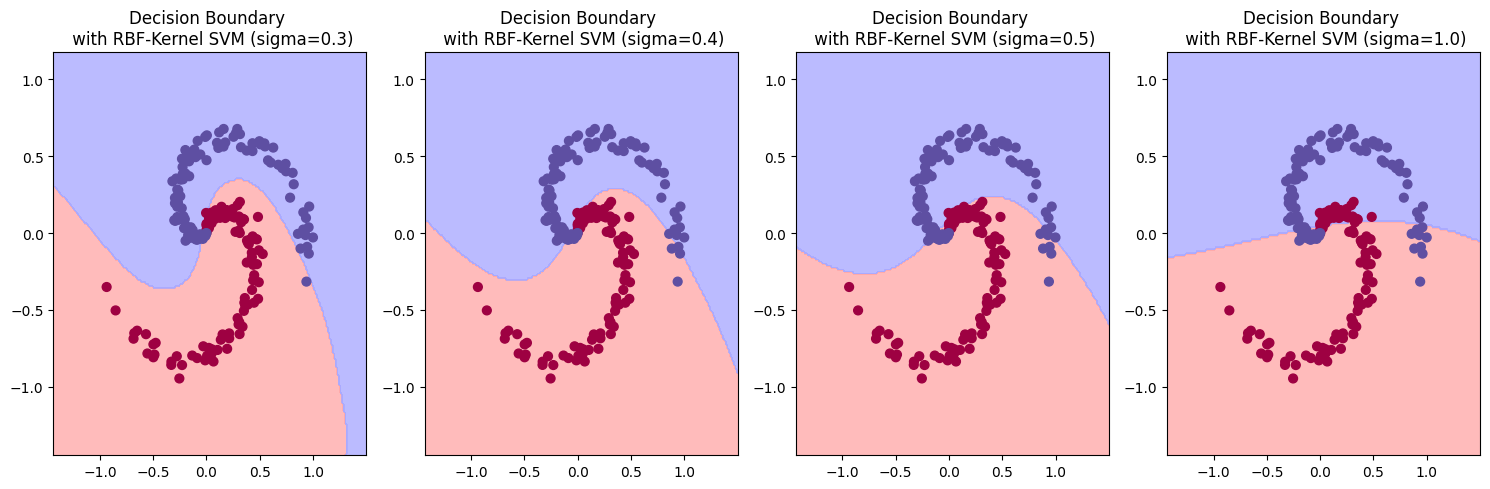

Training Error Rate for sigma=0.3: 3.50%
Training Error Rate for sigma=0.4: 6.50%
Training Error Rate for sigma=0.5: 11.00%
Training Error Rate for sigma=1.0: 28.50%


In [335]:
# training the model with 4 sigma values
sigma_values = [0.3, 0.4, 0.5, 1.0]
models = []

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# training and plotting for each sigma value
for i, sigma in enumerate(sigma_values):
    model = RBFKernelSVM(epochs=1000, lr=0.01, lambda_param=0.1, sigma=sigma)
    model.fit(X, y)
    models.append(model)
    plot_decision_boundary(axes[i], X_test, y_test, model, sigma)

# showing the plots
plt.tight_layout()
plt.show()

# calculating the training errors and printing them out
for i, model in enumerate(models):
    y_pred = model.predict(X)
    training_error = np.mean(y_pred != np.where(y == 0, -1, 1))
    print(f"Training Error Rate for sigma={sigma_values[i]}: {training_error * 100:.2f}%")
